# ARIMA AND SEASONAL ARIMA 

In [3]:
#import necessary libraries and packages

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('MawsynramCSV.csv')
df

C:\Users\mangeshk\AppData\Local\Temp\ipykernel_50148\232670566.py:1: DtypeWarning: Columns (4,5,14,65,66,68,69,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('MawsynramCSV.csv')


,DIV_NAME,SUB_DIV_NAME,SEC_NAME,CLUSTER_CODE,CONS_CODE,OLD_CONSNO,NAME,ADDRESS,METER_NO,EMETER_COD,...,DF_CU_DP,CU_DP,DF_CU_ED,CU_ED,DF_CU_FP,CU_FP,CU_BAL,SHORT_PD,CUR_EXCESSPAY,B_MON
0,WEILOI,EAST KHASI HILL,MAWSYNRAM,52,2521603401,NaN,RUPANNO HAJONG,KORAIKORA,47856,P,...,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.50,01-04-2019
1,WEILOI,EAST KHASI HILL,MAWSYNRAM,54,2542900800,8,RELINA SANGMA,THAKURMAW,481328,B,...,0.00,-12.83,5.75,-25.95,0.0,0.0,0.00,0.0,0.00,01-04-2019
2,WEILOI,EAST KHASI HILL,MAWSYNRAM,54,2543000200,2,RONESH SANGMA,UMNIANG,481335,B,...,122.39,-122.39,12.65,105.25,0.0,0.0,4674.15,0.0,0.00,01-04-2019
3,WEILOI,EAST KHASI HILL,MAWSYNRAM,54,2542900500,5,LOHIT SANGMA,THAKURMAW,481347,B,...,1744.37,1731.55,11.50,235.75,0.0,0.0,74053.51,0.0,0.00,01-04-2019
4,WEILOI,EAST KHASI HILL,MAWSYNRAM,54,2540901800,NaN,ANANTHU DAS,KAMARPHIL,481400,P,...,0.00,0.00,0.00,0.00,0.0,0.0,44178.53,0.0,0.00,01-04-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605736,WEILOI,EAST KHASI HILL,MAWSYNRAM,49,2490400400,32,DIMOS KHARBHIH,LAITSOHUM,4617,P,...,NaN,-1.71,NaN,-3.45,NaN,NaN,1.23,NaN,NaN,01-02-2022
605737,WEILOI,EAST KHASI HILL,MAWSYNRAM,49,2490400600,44,MENDALIN K.SYNTIEW,LAITSOHUM,7982,P,...,NaN,21.12,NaN,NaN,NaN,NaN,435.05,NaN,NaN,01-02-2022
605738,WEILOI,EAST KHASI HILL,MAWSYNRAM,48,2480304000,39K,TWINTIDA NIANGMIH,NONGLAIT,DUMMY5040,P,...,NaN,NaN,NaN,NaN,NaN,NaN,169.80,NaN,NaN,01-02-2022
605739,WEILOI,EAST KHASI HILL,MAWSYNRAM,55,2550402200,11,KHRISHNAH GURUNG,NOLIKATA,635627,P,...,NaN,NaN,NaN,NaN,NaN,NaN,3.04,NaN,NaN,01-02-2022


In [5]:
df.columns

Index(['DIV_NAME', 'SUB_DIV_NAME', 'SEC_NAME', 'CLUSTER_CODE', 'CONS_CODE',
       'OLD_CONSNO', 'NAME', 'ADDRESS', 'METER_NO', 'EMETER_COD',
       ...
       'DF_CU_DP', 'CU_DP', 'DF_CU_ED', 'CU_ED', 'DF_CU_FP', 'CU_FP', 'CU_BAL',
       'SHORT_PD', 'CUR_EXCESSPAY', 'B_MON'],
      dtype='object', length=114)

In [6]:
df['ADDRESS'] = df['ADDRESS'].str.strip()       #  removing blank space
df33 = df[~df['CITY'].isna()]      # non null values
df44 = df[df['CITY'].isna()]
df44['CITY'] = df44['ADDRESS']
df1 = pd.concat([df33, df44], axis=0)
df1['CITY'] = df1['CITY'].str.removeprefix('EKHD')
df1['CITY'] = df1['CITY'].str.strip()
df1['CITY'] = df1['CITY'].str.upper()
df1['CITY'].replace({'WAHNOKCHIRING':'WAHNOHSHIRING','WAHNOHCHIRING': 'WAHNOHSHIRING', 'UMLANGMER': 'UMLANGMAR',
 'TLONGPLENG': 'TRONGPLENG', 'TILAGOAN': 'TILAGAON','THIEDDIENG NEW': 'THIEDDIENG -NEW',   'THAINTHYNROH': 'THAIN THYNROH',     'T': 'MISSING',    'SYNDITOLA': 'SONDITOLA',  'SODORKURA': 'SODORKUNA', 'S0DORKUNA': 'SODORKUNA','RONGDANGAI': 'RONGDANGGAI',
  'RAJAI B': 'RAJAI-B', 'RAJAI A': 'RAJAI-A', 'RAJAI - B': 'RAJAI-B', 'RAJAI - A': 'RAJAI-A', 'RAJAGOAN': 'RAJAGAON', 
 'PYNDENSOHSHAM': 'PYNDENSOHSAW', 'PYNDENDAKNI': 'PYNDENKANI','PYNDENBORSOHRA': 'PYNDENBORSORA','PURNO NAGAR': 'PURNONAGAR',
    'PURNANAGAR': 'PURNONAGAR', 'PUNONAGAR': 'PURNONAGAR','PONGKUNGKUNG': 'PONGKUNG', 'POMSANNGUT': 'POMSANGUT',
  'POMSANGNGUT': 'POMSANGUT',  'PHUDSTIEN DONGRUM': 'PHUDSTEIN DONGRUM',  'PHOTKROH': 'PHUDKROH', 
                          'PHLANGMAWSYRPAD':  'PHLANGMAWSYRPAT', 'PANCHIRING-B': 'PAMSHARING B','PANCHIRING B': 'PAMSHARING B',
                          'PANCHIRING A': 'PAMSHARING A',
 'PANCHERING A': 'PAMSHARING A', 'NONGKASEN     PONGKUNG': 'NONGKASEN PONGKUNG',  'NONGDOM MAWRIA': 'NONGDOMMAWRIA', 
 'MAWPYLLU N': 'MAWPYLLUN','MAWPONGHONGG': 'MAWPONGHONG',  'MAKBILKHOL': 'MAKBILKOL',  'LYNGKHOM': 'LYNGKHON',
                          'LYNGDOHPHANBLANG': 'LYNGDOH PHANBLANG',
  'LUMDIENGAN': 'LYNGDOH PHANBLANG', 'LOWER  RAJAPARA': 'LOWER RAJAPARA', 'LAWBAH-I': 'LAWBAH-1',
 'LAWBAH -I': 'LAWBAH-1','LARGAON': 'LARGOAN','LAITSOHPHLANGANG': 'LAITSOHPHLANG','KHONJOY B': 'KHONJOY-B',
                          'KHONJOY A': 'KHONJOY-A',
 'KHANGKLAK': 'KHANGKLAR','KHANGKHLAKL': 'KHANGKHLAK', 'KHANGKHL': 'KHANGKHLAK',  'KANGKLAK': 'KHANGKHLAK', 
                          'KALASONDIA': 'KALASANDIA', 'IAPSHYNREH': 'IAPSYNREH',
 'HURUPAKNI': 'HURUPUKNI', 'HATMAWDON&KYRDOH': 'HATMAWDON&K-DOH', 'HATMAWDON&KDOH': 'HATMAWDON&K-DOH',  
                          'HAT MAWDON': 'HATMAWDON',
 'DONGRUM II': 'DONGRUM-II','DONGRUM - II': 'DONGRUM-II','DHOLAI BHOWALWAL': 'DHOLAI BHOWAL',
                          "DEWSAW{NONG'MAI": 'DEWSAW NONG-MAI',   'DEWSAW(NRIM)': 'DEWSAW(N-RIM)',
 'DANGAR DOMBAHBAHBAH': 'DANGAR DOMBAH','DANGAR DOMBAHBAH': 'DANGAR DOMBAH', 'CHIRRAKATA': 'CHITRAKATA',
                          'CHIRAKATTA': 'CHITRAKATA','CHIRAKATA': 'CHITRAKATA',
 'C&RD  BLOCK, RANIKOR': 'C&RD BLOCK RANIKOR','BORSOHRA': 'BORSORA', 'ASIMPARA-B': 'ASIMPARA B','ASIMGITIM': 'ASIMGITTIM', 
                          'AMPANGRE': 'AMPANGGRE', 'A': 'MISSING', '0': 'MISSING'}
    ,inplace=True)
    
    
df1['CITY'].fillna('MISSING',inplace=True)      # fill missing values 
miscity=df1[df1['CITY']=='MISSING'].index
df1.drop(miscity,axis=0,inplace=True)            # drop missing values 
df1.drop(columns=['ADDRESS'],inplace=True)

C:\Users\mangeshk\AppData\Local\Temp\ipykernel_50148\614891978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df44['CITY'] = df44['ADDRESS']


In [7]:
df1

,DIV_NAME,SUB_DIV_NAME,SEC_NAME,CLUSTER_CODE,CONS_CODE,OLD_CONSNO,NAME,METER_NO,EMETER_COD,EM_STATUS,...,DF_CU_DP,CU_DP,DF_CU_ED,CU_ED,DF_CU_FP,CU_FP,CU_BAL,SHORT_PD,CUR_EXCESSPAY,B_MON
0,WEILOI,EAST KHASI HILL,MAWSYNRAM,52,2521603401,NaN,RUPANNO HAJONG,47856,P,D,...,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.50,01-04-2019
1,WEILOI,EAST KHASI HILL,MAWSYNRAM,54,2542900800,8,RELINA SANGMA,481328,B,Y,...,0.00,-12.83,5.75,-25.95,0.0,0.0,0.00,0.0,0.00,01-04-2019
2,WEILOI,EAST KHASI HILL,MAWSYNRAM,54,2543000200,2,RONESH SANGMA,481335,B,D,...,122.39,-122.39,12.65,105.25,0.0,0.0,4674.15,0.0,0.00,01-04-2019
3,WEILOI,EAST KHASI HILL,MAWSYNRAM,54,2542900500,5,LOHIT SANGMA,481347,B,Y,...,1744.37,1731.55,11.50,235.75,0.0,0.0,74053.51,0.0,0.00,01-04-2019
4,WEILOI,EAST KHASI HILL,MAWSYNRAM,54,2540901800,NaN,ANANTHU DAS,481400,P,D,...,0.00,0.00,0.00,0.00,0.0,0.0,44178.53,0.0,0.00,01-04-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604646,WEILOI,EAST KHASI HILL,MAWSYNRAM,53,2530400008,NaN,EMBILA HAJONG,210863,P,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,21.61,NaN,NaN,01-02-2022
604692,WEILOI,EAST KHASI HILL,MAWSYNRAM,53,2530400012,NaN,PYNDAPLIN LARTANG,210892,P,D,...,NaN,NaN,2.90,NaN,NaN,NaN,223.95,NaN,NaN,01-02-2022
604753,WEILOI,EAST KHASI HILL,MAWSYNRAM,42,2420901000,10,MIIOLIS NONGSIEJ,1212823,B,Y,...,16.67,NaN,7.95,NaN,NaN,NaN,789.00,NaN,NaN,01-02-2022
605400,WEILOI,EAST KHASI HILL,MAWSYNRAM,42,2420903900,NaN,MANDALIN NONGSIEJ,L0646124,P,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92,01-02-2022


In [8]:
df=df1[['CATEGORY','CITY','ISSUE_DATE','BILL_AMT','B_MON']]
df

,CATEGORY,CITY,ISSUE_DATE,BILL_AMT,B_MON
0,DLT,KORAIKORA,18-03-2019,977.50,01-04-2019
1,DLT,THAKURMAW,26-02-2019,518.75,01-04-2019
2,DLT,UMNIANG,26-02-2019,5056.65,01-04-2019
3,DLT,THAKURMAW,26-02-2019,71747.89,01-04-2019
4,DLT,KAMARPHIL,26-12-2018,53178.53,01-04-2019
...,...,...,...,...,...
604646,BPLM,BALAT,06-02-2022,22.20,01-02-2022
604692,BPLM,BALAT,06-02-2022,224.40,01-02-2022
604753,BPLM,MAWTANGOR,10-02-2022,789.00,01-02-2022
605400,DLT,MAWTANGOR,10-02-2022,460.95,01-02-2022


In [9]:
df.isna().sum()

CATEGORY         0
CITY             0
ISSUE_DATE     818
BILL_AMT      2366
B_MON            0
dtype: int64

In [10]:
a=df[df['BILL_AMT'].isna()].index

b=df[df['ISSUE_DATE'].isna()].index

In [11]:
df.drop(a,inplace=True)

C:\Users\mangeshk\AppData\Local\Temp\ipykernel_50148\1270002867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(a,inplace=True)


In [12]:
df.drop(b,inplace=True)

C:\Users\mangeshk\AppData\Local\Temp\ipykernel_50148\1939395901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(b,inplace=True)


In [13]:
df.isna().sum()

CATEGORY      0
CITY          0
ISSUE_DATE    0
BILL_AMT      0
B_MON         0
dtype: int64

In [14]:
df1=df.copy()
df1

,CATEGORY,CITY,ISSUE_DATE,BILL_AMT,B_MON
0,DLT,KORAIKORA,18-03-2019,977.50,01-04-2019
1,DLT,THAKURMAW,26-02-2019,518.75,01-04-2019
2,DLT,UMNIANG,26-02-2019,5056.65,01-04-2019
3,DLT,THAKURMAW,26-02-2019,71747.89,01-04-2019
4,DLT,KAMARPHIL,26-12-2018,53178.53,01-04-2019
...,...,...,...,...,...
604646,BPLM,BALAT,06-02-2022,22.20,01-02-2022
604692,BPLM,BALAT,06-02-2022,224.40,01-02-2022
604753,BPLM,MAWTANGOR,10-02-2022,789.00,01-02-2022
605400,DLT,MAWTANGOR,10-02-2022,460.95,01-02-2022


In [15]:
df['day']=df['ISSUE_DATE'].str[:2]

C:\Users\mangeshk\AppData\Local\Temp\ipykernel_50148\2205977389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day']=df['ISSUE_DATE'].str[:2]


In [16]:
df['month']=df['ISSUE_DATE'].str[3:5]

C:\Users\mangeshk\AppData\Local\Temp\ipykernel_50148\3952647578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['ISSUE_DATE'].str[3:5]


In [17]:
df['year']=df['ISSUE_DATE'].str[6:10]

C:\Users\mangeshk\AppData\Local\Temp\ipykernel_50148\1184608852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['ISSUE_DATE'].str[6:10]


In [18]:
df

,CATEGORY,CITY,ISSUE_DATE,BILL_AMT,B_MON,day,month,year
0,DLT,KORAIKORA,18-03-2019,977.50,01-04-2019,18,03,2019
1,DLT,THAKURMAW,26-02-2019,518.75,01-04-2019,26,02,2019
2,DLT,UMNIANG,26-02-2019,5056.65,01-04-2019,26,02,2019
3,DLT,THAKURMAW,26-02-2019,71747.89,01-04-2019,26,02,2019
4,DLT,KAMARPHIL,26-12-2018,53178.53,01-04-2019,26,12,2018
...,...,...,...,...,...,...,...,...
604646,BPLM,BALAT,06-02-2022,22.20,01-02-2022,06,02,2022
604692,BPLM,BALAT,06-02-2022,224.40,01-02-2022,06,02,2022
604753,BPLM,MAWTANGOR,10-02-2022,789.00,01-02-2022,10,02,2022
605400,DLT,MAWTANGOR,10-02-2022,460.95,01-02-2022,10,02,2022


In [19]:
df['year'] = df['year'].replace({'0019': '2019', '0020': '2020','0021': '2021','0022': '2022','0014': '2014','0016': '2016','0018': '2018'})


C:\Users\mangeshk\AppData\Local\Temp\ipykernel_50148\1573619256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].replace({'0019': '2019', '0020': '2020','0021': '2021','0022': '2022','0014': '2014','0016': '2016','0018': '2018'})


In [20]:
df=df[['month','year','BILL_AMT']]
df

,month,year,BILL_AMT
0,03,2019,977.50
1,02,2019,518.75
2,02,2019,5056.65
3,02,2019,71747.89
4,12,2018,53178.53
...,...,...,...
604646,02,2022,22.20
604692,02,2022,224.40
604753,02,2022,789.00
605400,02,2022,460.95


In [21]:
a=df.groupby(['month','year'])

In [22]:
df=pd.DataFrame(a['BILL_AMT'].sum())

In [23]:
df

BILL_AMT
month year              
01    2016  1.135505e+06
      2019  3.403703e+07
      2020  1.819166e+08
      2021  1.053634e+08
      2022  3.013648e+07
02    2019  1.429460e+08
      2020  1.247945e+08
      2021  8.558519e+07
      2022  2.810505e+07
03    2017  9.099385e+05
      2018  1.384214e+07
      2019  8.405129e+07
      2020  1.573786e+08
      2021  1.880660e+08
      2022  2.868575e+07
04    2017  0.000000e+00
      2018  3.744000e+04
      2019  4.492328e+07
      2020  5.776559e+07
      2021  5.462765e+07
05    2016  0.000000e+00
      2017  8.000124e+05
      2019  8.197533e+07
      2020  1.125269e+08
      2021  5.097823e+07
06    2016  2.202518e+06
      2018  6.754780e+06
      2019  4.651264e+05
      2020  1.116228e+08
      2021  3.400299e+07
07    2014  5.390433e+06
      2016  0.000000e+00
      2017  6.384136e+06
      2018  1.314655e+06
      2019  1.854406e+08
      2020  9.454067e+07
      2021  3.533652e+07
08    2019  1.354805e+08
      2020  9.260964e+07
      2021  3.752055e+07
09    2018  7.635887e+05
      2019  1.128915e+08
      2020  9.270501e+07
      2021  3.878833e+07
10    2014  7.592540e+05
      2018  5.252468e+05
      2019  1.110525e+08
      2020  9.962796e+07
      2021  3.632562e+07
11    2014  5.972768e+05
      2018  1.023208e+07
      2019  1.217560e+08
      2020  9.745623e+07
      2021  3.656868e+07
12    2016  5.102353e+05
      2018  3.409433e+07
      2019  9.607591e+07
      2020  9.641243e+07
      2021  3.607302e+07

In [24]:
df.unstack()

BILL_AMT                                                     \
year         2014        2016        2017         2018          2019   
month                                                                  
01            NaN  1135504.81         NaN          NaN  3.403703e+07   
02            NaN         NaN         NaN          NaN  1.429460e+08   
03            NaN         NaN   909938.46  13842139.09  8.405129e+07   
04            NaN         NaN        0.00     37440.00  4.492328e+07   
05            NaN        0.00   800012.43          NaN  8.197533e+07   
06            NaN  2202518.23         NaN   6754779.78  4.651264e+05   
07     5390433.00        0.00  6384136.34   1314655.21  1.854406e+08   
08            NaN         NaN         NaN          NaN  1.354805e+08   
09            NaN         NaN         NaN    763588.70  1.128915e+08   
10      759254.00         NaN         NaN    525246.79  1.110525e+08   
11      597276.85         NaN         NaN  10232083.28  1.217560e+08   
12            NaN   510235.35         NaN  34094327.76  9.607591e+07   

                                                
year           2020          2021         2022  
month                                           
01     1.819166e+08  1.053634e+08  30136481.46  
02     1.247945e+08  8.558519e+07  28105045.95  
03     1.573786e+08  1.880660e+08  28685745.50  
04     5.776559e+07  5.462765e+07          NaN  
05     1.125269e+08  5.097823e+07          NaN  
06     1.116228e+08  3.400299e+07          NaN  
07     9.454067e+07  3.533652e+07          NaN  
08     9.260964e+07  3.752055e+07          NaN  
09     9.270501e+07  3.878833e+07          NaN  
10     9.962796e+07  3.632562e+07          NaN  
11     9.745623e+07  3.656868e+07          NaN  
12     9.641243e+07  3.607302e+07          NaN

<Axes: xlabel='month,year'>

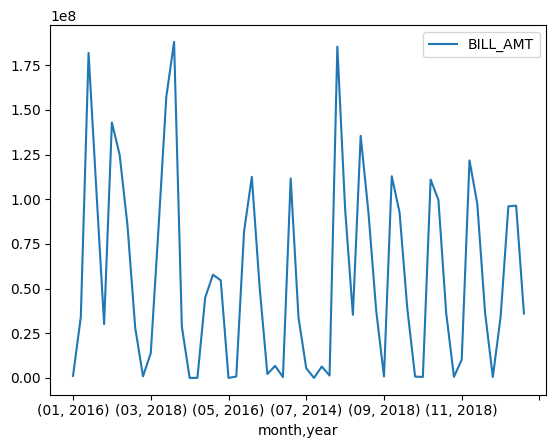

In [25]:
df.plot()

In [26]:
df.stack()

month  year          
01     2016  BILL_AMT    1.135505e+06
       2019  BILL_AMT    3.403703e+07
       2020  BILL_AMT    1.819166e+08
       2021  BILL_AMT    1.053634e+08
       2022  BILL_AMT    3.013648e+07
02     2019  BILL_AMT    1.429460e+08
       2020  BILL_AMT    1.247945e+08
       2021  BILL_AMT    8.558519e+07
       2022  BILL_AMT    2.810505e+07
03     2017  BILL_AMT    9.099385e+05
       2018  BILL_AMT    1.384214e+07
       2019  BILL_AMT    8.405129e+07
       2020  BILL_AMT    1.573786e+08
       2021  BILL_AMT    1.880660e+08
       2022  BILL_AMT    2.868575e+07
04     2017  BILL_AMT    0.000000e+00
       2018  BILL_AMT    3.744000e+04
       2019  BILL_AMT    4.492328e+07
       2020  BILL_AMT    5.776559e+07
       2021  BILL_AMT    5.462765e+07
05     2016  BILL_AMT    0.000000e+00
       2017  BILL_AMT    8.000124e+05
       2019  BILL_AMT    8.197533e+07
       2020  BILL_AMT    1.125269e+08
       2021  BILL_AMT    5.097823e+07
06     2016  BILL_AMT    2.2

In [27]:
df

BILL_AMT
month year              
01    2016  1.135505e+06
      2019  3.403703e+07
      2020  1.819166e+08
      2021  1.053634e+08
      2022  3.013648e+07
02    2019  1.429460e+08
      2020  1.247945e+08
      2021  8.558519e+07
      2022  2.810505e+07
03    2017  9.099385e+05
      2018  1.384214e+07
      2019  8.405129e+07
      2020  1.573786e+08
      2021  1.880660e+08
      2022  2.868575e+07
04    2017  0.000000e+00
      2018  3.744000e+04
      2019  4.492328e+07
      2020  5.776559e+07
      2021  5.462765e+07
05    2016  0.000000e+00
      2017  8.000124e+05
      2019  8.197533e+07
      2020  1.125269e+08
      2021  5.097823e+07
06    2016  2.202518e+06
      2018  6.754780e+06
      2019  4.651264e+05
      2020  1.116228e+08
      2021  3.400299e+07
07    2014  5.390433e+06
      2016  0.000000e+00
      2017  6.384136e+06
      2018  1.314655e+06
      2019  1.854406e+08
      2020  9.454067e+07
      2021  3.533652e+07
08    2019  1.354805e+08
      2020  9.260964e+07
      2021  3.752055e+07
09    2018  7.635887e+05
      2019  1.128915e+08
      2020  9.270501e+07
      2021  3.878833e+07
10    2014  7.592540e+05
      2018  5.252468e+05
      2019  1.110525e+08
      2020  9.962796e+07
      2021  3.632562e+07
11    2014  5.972768e+05
      2018  1.023208e+07
      2019  1.217560e+08
      2020  9.745623e+07
      2021  3.656868e+07
12    2016  5.102353e+05
      2018  3.409433e+07
      2019  9.607591e+07
      2020  9.641243e+07
      2021  3.607302e+07

In [28]:
df.to_csv('billamt1.csv')


In [29]:
df=pd.read_csv('billamt1.csv')
df

,month,year,BILL_AMT
0,1,2016,1.135505e+06
1,1,2019,3.403703e+07
2,1,2020,1.819166e+08
3,1,2021,1.053634e+08
4,1,2022,3.013648e+07
5,2,2019,1.429460e+08
6,2,2020,1.247945e+08
7,2,2021,8.558519e+07
8,2,2022,2.810505e+07
9,3,2017,9.099385e+05


In [31]:
#import requires libraries for forecasting

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller       #  to cheak stationarity
from statsmodels.tsa.seasonal import seasonal_decompose    # to cheak  seasonality
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf   # to cheak auto correalation  and partial auto partial correlation
from statsmodels.tsa.statespace.sarimax import SARIMAX     # seasonal arimax in case of seasonality   and if data is non seasonal then use arimax
from sklearn.metrics import mean_squared_error

In [32]:
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
df.set_index('Date', inplace=True)
df.drop(['month', 'year'], axis=1, inplace=True)

In [33]:
df,df.shape

(                BILL_AMT
 Date                    
 2016-01-01  1.135505e+06
 2019-01-01  3.403703e+07
 2020-01-01  1.819166e+08
 2021-01-01  1.053634e+08
 2022-01-01  3.013648e+07
 2019-02-01  1.429460e+08
 2020-02-01  1.247945e+08
 2021-02-01  8.558519e+07
 2022-02-01  2.810505e+07
 2017-03-01  9.099385e+05
 2018-03-01  1.384214e+07
 2019-03-01  8.405129e+07
 2020-03-01  1.573786e+08
 2021-03-01  1.880660e+08
 2022-03-01  2.868575e+07
 2017-04-01  0.000000e+00
 2018-04-01  3.744000e+04
 2019-04-01  4.492328e+07
 2020-04-01  5.776559e+07
 2021-04-01  5.462765e+07
 2016-05-01  0.000000e+00
 2017-05-01  8.000124e+05
 2019-05-01  8.197533e+07
 2020-05-01  1.125269e+08
 2021-05-01  5.097823e+07
 2016-06-01  2.202518e+06
 2018-06-01  6.754780e+06
 2019-06-01  4.651264e+05
 2020-06-01  1.116228e+08
 2021-06-01  3.400299e+07
 2014-07-01  5.390433e+06
 2016-07-01  0.000000e+00
 2017-07-01  6.384136e+06
 2018-07-01  1.314655e+06
 2019-07-01  1.854406e+08
 2020-07-01  9.454067e+07
 2021-07-01 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def check_stationarity(y):
    # Rolling statistics
    rolling_mean = y.rolling(window=12).mean()
    rolling_std = y.rolling(window=12).std()

    # Plot rolling statistics
    fig, ax = plt.subplots()
    ax.plot(y, color='blue', label='Original')
    ax.plot(rolling_mean, color='red', label='Rolling Mean')
    ax.plot(rolling_std, color='black', label='Rolling Std')
    ax.legend()
    ax.set(title='Rolling Mean & Standard Deviation')
    plt.show()

    # Augmented Dickey-Fuller test
    print('Results of Augmented Dickey-Fuller Test:')
    adf_test = adfuller(y, autolag='AIC')
    adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Observations Used'])
    for key, value in adf_test[4].items():
        adf_output['Critical Value (%s)' % key] = value
    print(adf_output)


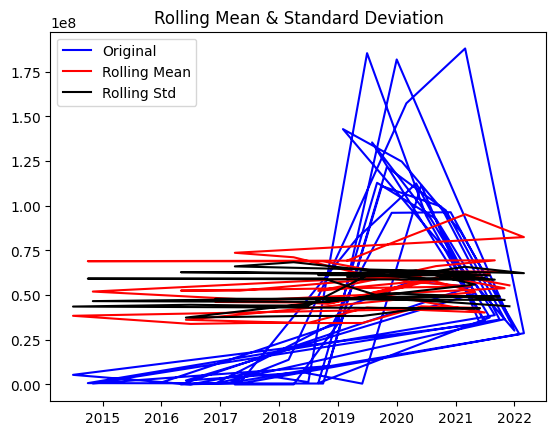

Results of Augmented Dickey-Fuller Test:
Test Statistic         -7.247358e+00
p-value                 1.817523e-10
Lags Used               1.000000e+00
Observations Used       5.700000e+01
Critical Value (1%)    -3.550670e+00
Critical Value (5%)    -2.913766e+00
Critical Value (10%)   -2.594624e+00
dtype: float64


In [35]:
check_stationarity(df['BILL_AMT'])

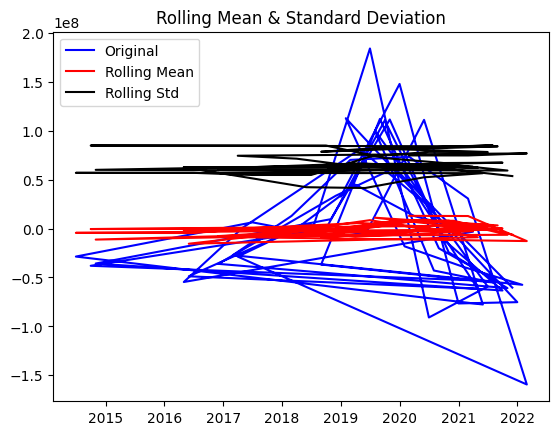

Results of Augmented Dickey-Fuller Test:
Test Statistic         -6.532820e+00
p-value                 9.773380e-09
Lags Used               4.000000e+00
Observations Used       5.300000e+01
Critical Value (1%)    -3.560242e+00
Critical Value (5%)    -2.917850e+00
Critical Value (10%)   -2.596796e+00
dtype: float64


In [36]:
df_diff = df.diff().dropna()
check_stationarity(df_diff['BILL_AMT'])

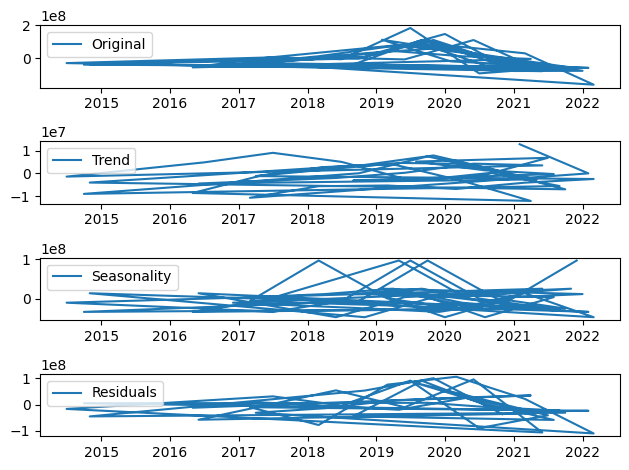

In [37]:
decomposition = seasonal_decompose(df_diff['BILL_AMT'],model='additive', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_diff['BILL_AMT'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [38]:
# Define the training and testing data
train_data = df_diff['BILL_AMT'][:'2021-01-01']
test_data = df_diff['BILL_AMT']['2021-02-01':]



In [39]:
test_data

Date
2022-01-01   -7.522693e+07
2021-02-01   -3.920931e+07
2022-02-01   -5.748015e+07
2021-03-01    3.068733e+07
2022-03-01   -1.593802e+08
2021-04-01   -3.137940e+06
2021-05-01   -6.154866e+07
2021-06-01   -7.761985e+07
2021-07-01   -5.920415e+07
2021-08-01   -5.508909e+07
2021-09-01   -5.391668e+07
2021-10-01   -6.330235e+07
2021-11-01   -6.088755e+07
2021-12-01   -6.033941e+07
Name: BILL_AMT, dtype: float64

In [40]:
train_data

Date
2019-01-01    3.290153e+07
2020-01-01    1.478796e+08
2021-01-01   -7.655320e+07
2019-02-01    1.128095e+08
2020-02-01   -1.815151e+07
2017-03-01   -2.719511e+07
2018-03-01    1.293220e+07
2019-03-01    7.020915e+07
2020-03-01    7.332733e+07
2017-04-01   -2.868575e+07
2018-04-01    3.744000e+04
2019-04-01    4.488584e+07
2020-04-01    1.284232e+07
2016-05-01   -5.462765e+07
2017-05-01    8.000124e+05
2019-05-01    8.117532e+07
2020-05-01    3.055156e+07
2016-06-01   -4.877571e+07
2018-06-01    4.552262e+06
2019-06-01   -6.289653e+06
2020-06-01    1.111577e+08
2014-07-01   -2.861256e+07
2016-07-01   -5.390433e+06
2017-07-01    6.384136e+06
2018-07-01   -5.069481e+06
2019-07-01    1.841259e+08
2020-07-01   -9.089990e+07
2019-08-01    1.001440e+08
2020-08-01   -4.287085e+07
2018-09-01   -3.675696e+07
2019-09-01    1.121279e+08
2020-09-01   -2.018645e+07
2014-10-01   -3.802907e+07
2018-10-01   -2.340072e+05
2019-10-01    1.105273e+08
2020-10-01   -1.142456e+07
2014-11-01   -3.572834e

In [41]:
model = SARIMAX(train_data, order=(1,1,1), seasonal_order=(0,1,1,12))


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

In [42]:
model

In [43]:
results = model.fit()


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [44]:
results

In [47]:
forecast=results.predict(start=pd.to_datetime('2020-01-01'), end=pd.to_datetime('2020-06-01'), dynamic=False)

In [50]:
forecast=forecast.add(df['BILL_AMT'].iloc[-1])


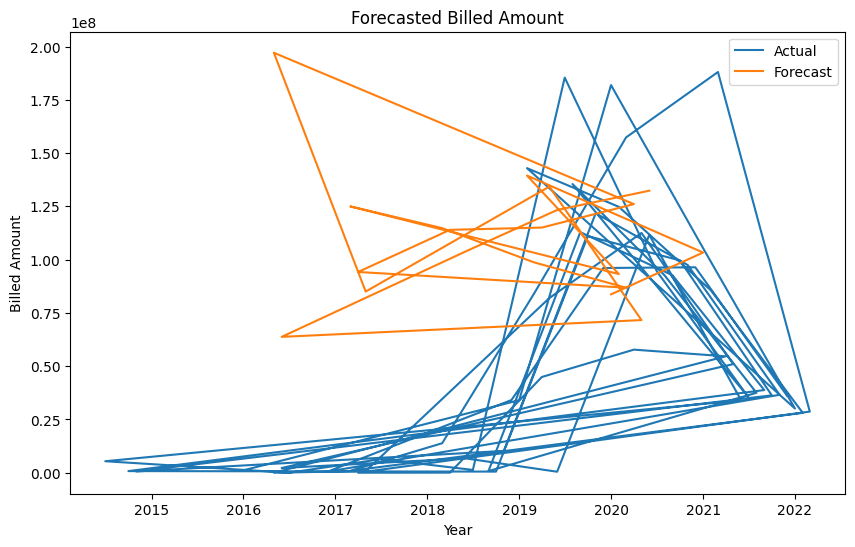

In [52]:
plt.figure(figsize=(10,6))
plt.plot(df['BILL_AMT'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.title('Forecasted Billed Amount')
plt.xlabel('Year')
plt.ylabel('Billed Amount')
plt.show()

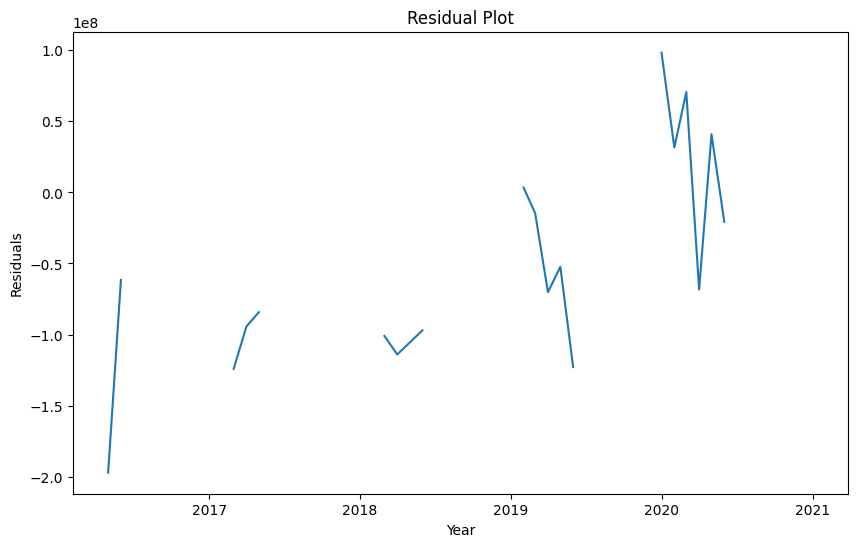

In [54]:
residuals = df['BILL_AMT'] - forecast
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residual Plot')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


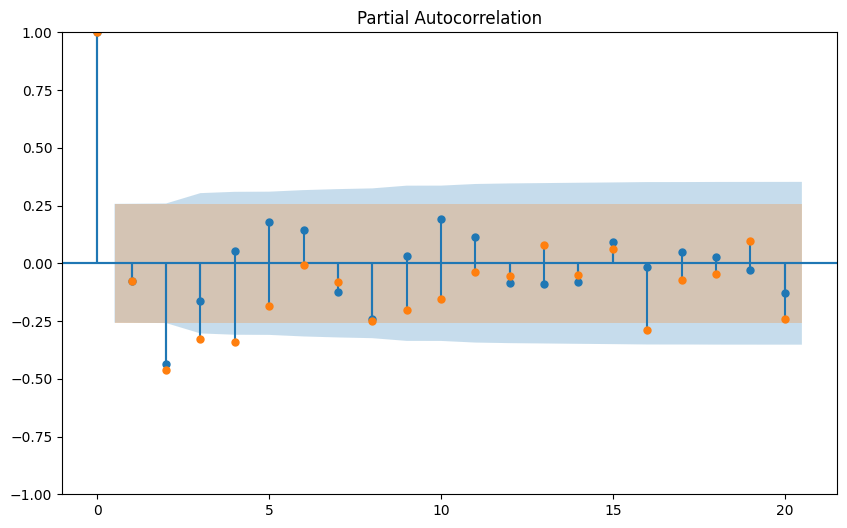

In [55]:
plt.figure(figsize=(10,6))
plot_acf(df_diff['BILL_AMT'], ax=plt.gca(), lags=20)
plot_pacf(df_diff['BILL_AMT'], ax=plt.gca(), lags=20)
plt.show()

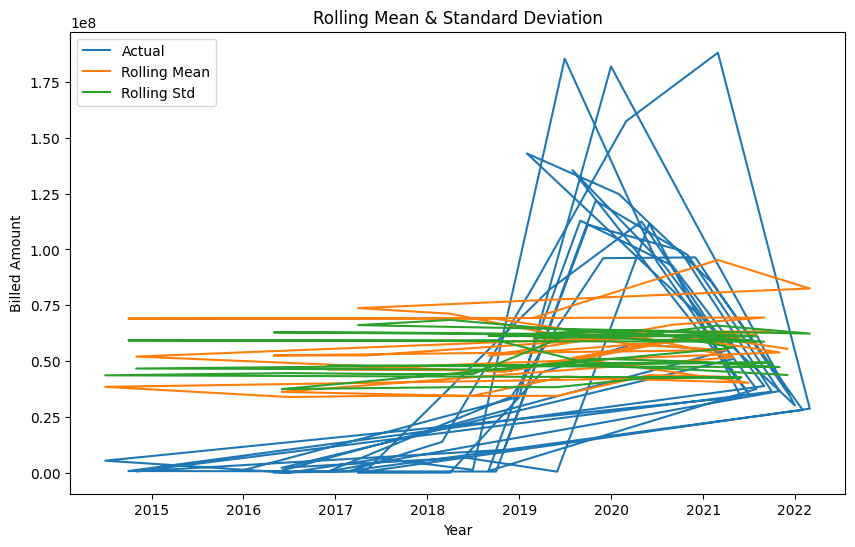

In [56]:
rolling_mean = df['BILL_AMT'].rolling(window=12).mean()
rolling_std = df['BILL_AMT'].rolling(window=12).std()

plt.figure(figsize=(10,6))
plt.plot(df['BILL_AMT'], label='Actual')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Billed Amount')
plt.show()

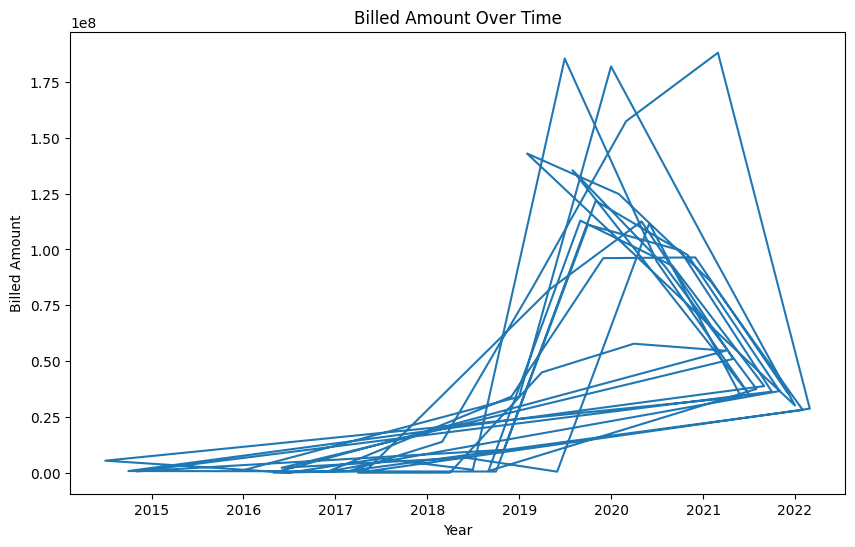

In [57]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['BILL_AMT'])
plt.title('Billed Amount Over Time')
plt.xlabel('Year')
plt.ylabel('Billed Amount')
plt.show()

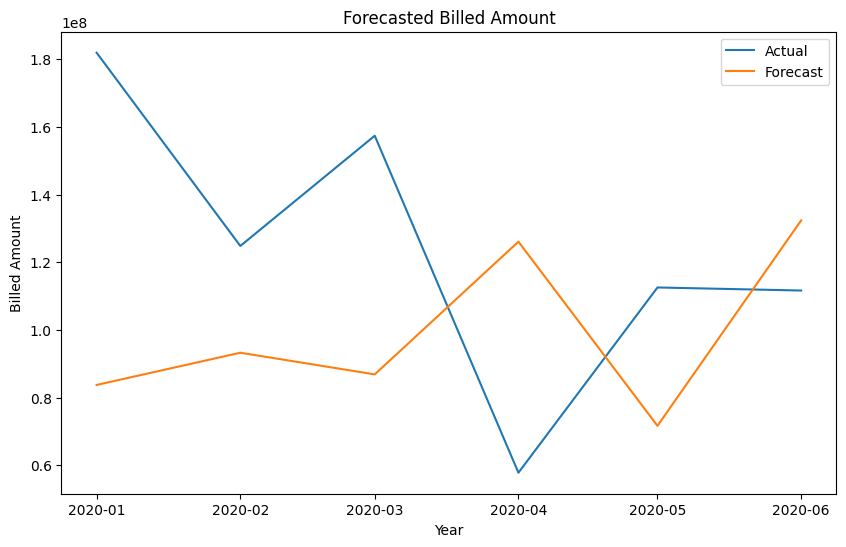

In [61]:
plt.figure(figsize=(10,6))
plt.plot(df['BILL_AMT'].loc['2020-01-01':'2020-06-01'], label='Actual')
plt.plot(forecast.loc['2020-01-01':'2020-06-01'], label='Forecast')
plt.legend()
plt.title('Forecasted Billed Amount')
plt.xlabel('Year')
plt.ylabel('Billed Amount')
plt.show()

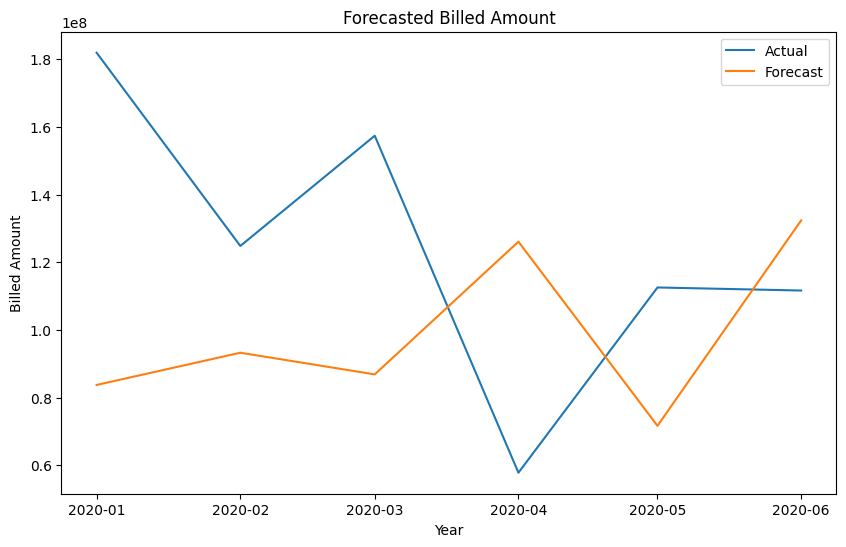

In [62]:
plt.figure(figsize=(10,6))
plt.plot(df['BILL_AMT'].loc['2020-01-01':'2020-06-01'], label='Actual')
plt.plot(forecast.loc['2020-01-01':'2020-06-01'], label='Forecast')
plt.legend()
plt.title('Forecasted Billed Amount')
plt.xlabel('Year')
plt.ylabel('Billed Amount')
plt.show()

In [65]:
forecast=results.predict(start=pd.to_datetime('2020-01-01'), end=pd.to_datetime('2020-06-01'), dynamic=False)
forecast=forecast.add(df['BILL_AMT'].iloc[-1])

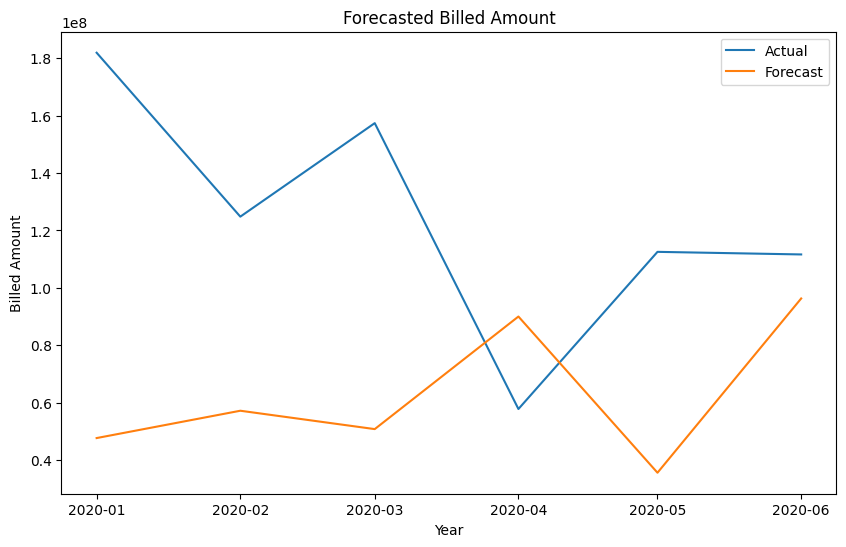

In [66]:
plt.figure(figsize=(10,6))
plt.plot(df['BILL_AMT'].loc['2020-01-01':'2020-06-01'], label='Actual')
plt.plot(forecast.loc['2020-01-01':'2020-06-01'], label='Forecast')
plt.legend()
plt.title('Forecasted Billed Amount')
plt.xlabel('Year')
plt.ylabel('Billed Amount')
plt.show()

In [67]:
train_data

Date
2019-01-01    3.290153e+07
2020-01-01    1.478796e+08
2021-01-01   -7.655320e+07
2019-02-01    1.128095e+08
2020-02-01   -1.815151e+07
2017-03-01   -2.719511e+07
2018-03-01    1.293220e+07
2019-03-01    7.020915e+07
2020-03-01    7.332733e+07
2017-04-01   -2.868575e+07
2018-04-01    3.744000e+04
2019-04-01    4.488584e+07
2020-04-01    1.284232e+07
2016-05-01   -5.462765e+07
2017-05-01    8.000124e+05
2019-05-01    8.117532e+07
2020-05-01    3.055156e+07
2016-06-01   -4.877571e+07
2018-06-01    4.552262e+06
2019-06-01   -6.289653e+06
2020-06-01    1.111577e+08
2014-07-01   -2.861256e+07
2016-07-01   -5.390433e+06
2017-07-01    6.384136e+06
2018-07-01   -5.069481e+06
2019-07-01    1.841259e+08
2020-07-01   -9.089990e+07
2019-08-01    1.001440e+08
2020-08-01   -4.287085e+07
2018-09-01   -3.675696e+07
2019-09-01    1.121279e+08
2020-09-01   -2.018645e+07
2014-10-01   -3.802907e+07
2018-10-01   -2.340072e+05
2019-10-01    1.105273e+08
2020-10-01   -1.142456e+07
2014-11-01   -3.572834e

In [68]:
forecast=results.predict(start=pd.to_datetime('2020-01-01'), end=pd.to_datetime('2020-12-01'))

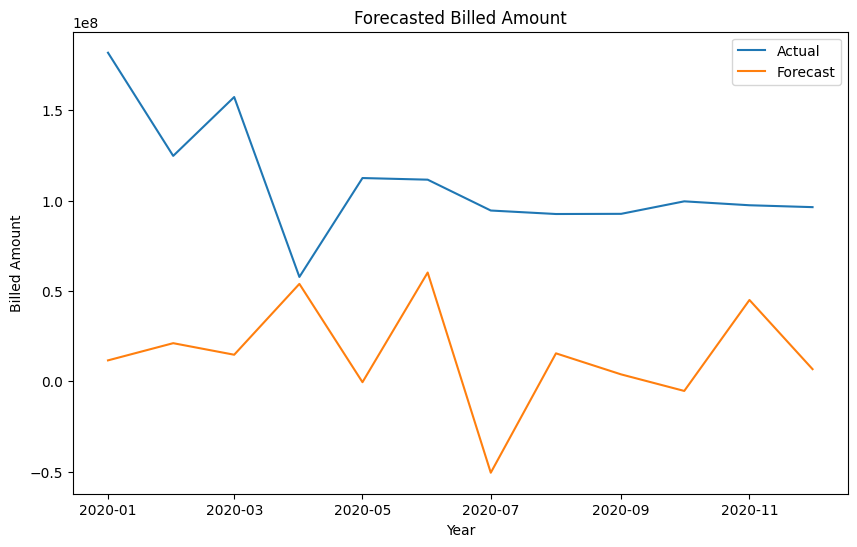

In [69]:
plt.figure(figsize=(10,6))
plt.plot(df['BILL_AMT'].loc['2020-01-01':'2020-12-01'], label='Actual')
plt.plot(forecast.loc['2020-01-01':'2020-12-01'], label='Forecast')
plt.legend()
plt.title('Forecasted Billed Amount')
plt.xlabel('Year')
plt.ylabel('Billed Amount')
plt.show()

In [71]:
forecast.loc['2020-01-01':'2020-12-01']

Date
2020-01-01    1.156476e+07
2020-02-01    2.108794e+07
2020-03-01    1.468782e+07
2020-04-01    5.391519e+07
2020-05-01   -5.120079e+05
2020-06-01    6.020721e+07
2020-07-01   -5.064255e+07
2020-08-01    1.546218e+07
2020-09-01    3.797413e+06
2020-10-01   -5.357615e+06
2020-11-01    4.500754e+07
2020-12-01    6.705716e+06
Name: predicted_mean, dtype: float64

In [72]:
df['BILL_AMT'].loc['2020-01-01':'2020-12-01']

Date
2020-01-01    1.819166e+08
2020-02-01    1.247945e+08
2020-03-01    1.573786e+08
2020-04-01    5.776559e+07
2020-05-01    1.125269e+08
2020-06-01    1.116228e+08
2020-07-01    9.454067e+07
2020-08-01    9.260964e+07
2020-09-01    9.270501e+07
2020-10-01    9.962796e+07
2020-11-01    9.745623e+07
2020-12-01    9.641243e+07
Name: BILL_AMT, dtype: float64

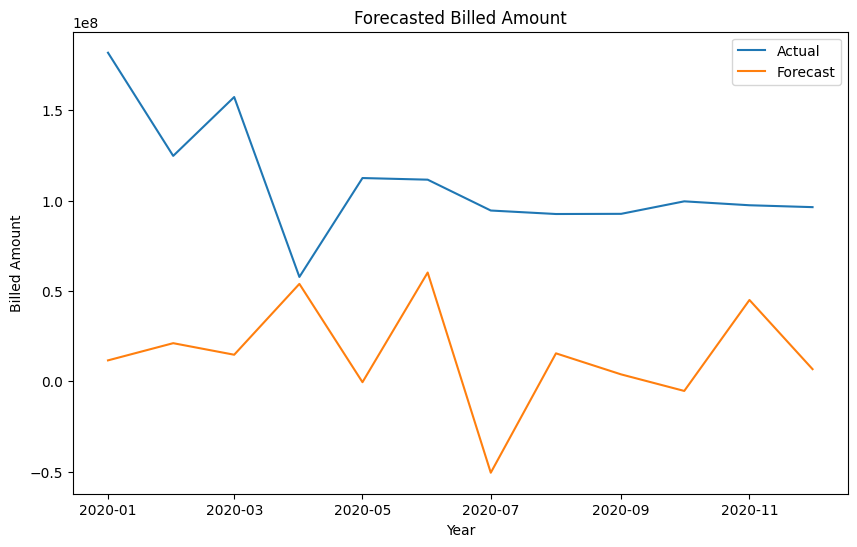

In [74]:
plt.figure(figsize=(10,6))
plt.plot(df['BILL_AMT'].loc['2020-01-01':'2020-12-01'], label='Actual')
plt.plot(forecast.loc['2020-01-01':'2020-12-01'], label='Forecast')
plt.legend()
plt.title('Forecasted Billed Amount')
plt.xlabel('Year')
plt.ylabel('Billed Amount')
plt.show()

# Another approch

In [75]:
df1

,CATEGORY,CITY,ISSUE_DATE,BILL_AMT,B_MON
0,DLT,KORAIKORA,18-03-2019,977.50,01-04-2019
1,DLT,THAKURMAW,26-02-2019,518.75,01-04-2019
2,DLT,UMNIANG,26-02-2019,5056.65,01-04-2019
3,DLT,THAKURMAW,26-02-2019,71747.89,01-04-2019
4,DLT,KAMARPHIL,26-12-2018,53178.53,01-04-2019
...,...,...,...,...,...
604646,BPLM,BALAT,06-02-2022,22.20,01-02-2022
604692,BPLM,BALAT,06-02-2022,224.40,01-02-2022
604753,BPLM,MAWTANGOR,10-02-2022,789.00,01-02-2022
605400,DLT,MAWTANGOR,10-02-2022,460.95,01-02-2022


In [76]:
df1['B_MON']=pd.to_datetime(df1['B_MON'],format='%d-%m-%Y')

In [77]:
a=df1.groupby('B_MON')

In [78]:
df1=a['BILL_AMT'].sum()
df1

B_MON
2019-04-01    9.429956e+07
2019-05-01    1.006964e+08
2019-06-01    1.007456e+08
2019-07-01    1.054412e+08
2019-08-01    1.066195e+08
2019-09-01    1.078479e+08
2019-10-01    1.066540e+08
2019-11-01    1.092705e+08
2019-12-01    1.136057e+08
2020-01-01    1.159678e+08
2020-02-01    1.161650e+08
2020-03-01    1.145907e+08
2020-04-01    1.161930e+08
2020-05-01    1.209510e+08
2020-06-01    1.156914e+08
2020-07-01    1.145182e+08
2020-08-01    1.119405e+08
2020-09-01    1.104025e+08
2020-10-01    1.117363e+08
2020-11-01    1.138131e+08
2020-12-01    1.098970e+08
2021-01-01    1.105181e+08
2021-02-01    1.048506e+08
2021-03-01    1.031219e+08
2021-04-01    9.058550e+07
2021-05-01    8.882151e+07
2021-06-01    1.088297e+08
2021-07-01    8.728565e+07
2021-08-01    8.895180e+07
2021-09-01    4.496850e+07
2021-10-01    4.498198e+07
2021-11-01    4.428502e+07
2021-12-01    4.184425e+07
2022-01-01    4.013491e+07
2022-02-01    3.342534e+07
2022-03-01    3.321736e+07
Name: BILL_AMT, dtype:

Text(0.5, 0, 'BILLING MONTH')

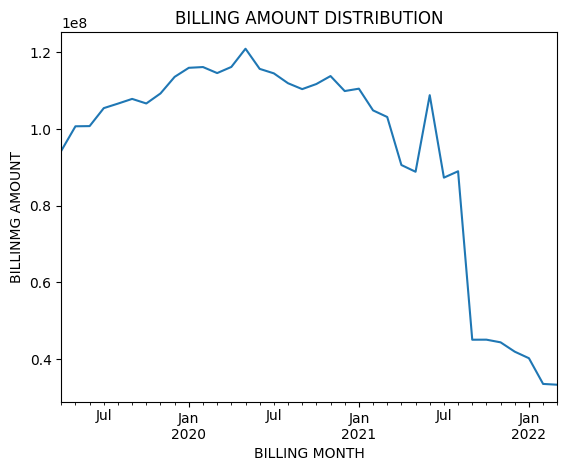

In [79]:
df1.plot()

plt.title('BILLING AMOUNT DISTRIBUTION')
plt.ylabel('BILLINMG AMOUNT')
plt.xlabel('BILLING MONTH')



In [80]:
df1=pd.DataFrame(df1)

<Axes: xlabel='B_MON'>

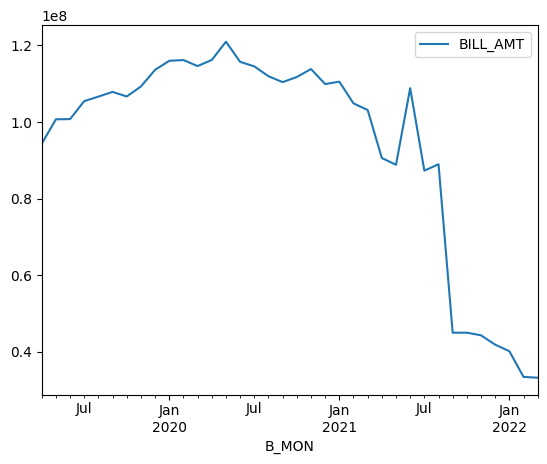

In [81]:
df1.plot()

In [82]:
df1

,BILL_AMT
B_MON,
2019-04-01,9.429956e+07
2019-05-01,1.006964e+08
2019-06-01,1.007456e+08
2019-07-01,1.054412e+08
2019-08-01,1.066195e+08
2019-09-01,1.078479e+08
2019-10-01,1.066540e+08
2019-11-01,1.092705e+08
2019-12-01,1.136057e+08


In [83]:
df1.describe()

,BILL_AMT
count,3.600000e+01
mean,9.396858e+07
std,2.801820e+07
min,3.321736e+07
25%,8.891923e+07
50%,1.066367e+08
75%,1.123568e+08
max,1.209510e+08


<Axes: xlabel='B_MON'>

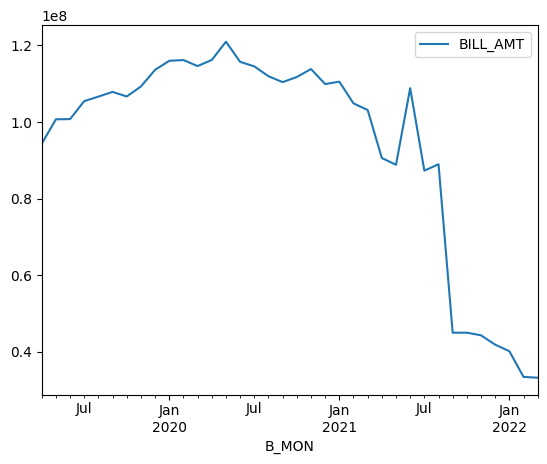

In [84]:
df1.plot()

In [85]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df1['BILL_AMT'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(BILL_AMT):
    result=adfuller(BILL_AMT)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    


In [86]:
adfuller_test(df1['BILL_AMT'])

ADF Test Statistic : 0.06292444200070396
p-value : 0.9634366900627976
#Lags Used : 9
Number of Observations Used : 26
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Diffrencing 

In [87]:
df1['bill_amt First Difference'] = df1['BILL_AMT'] - df1['BILL_AMT'].shift(1)
df1['BILL_AMT'].shift(1)

B_MON
2019-04-01             NaN
2019-05-01    9.429956e+07
2019-06-01    1.006964e+08
2019-07-01    1.007456e+08
2019-08-01    1.054412e+08
2019-09-01    1.066195e+08
2019-10-01    1.078479e+08
2019-11-01    1.066540e+08
2019-12-01    1.092705e+08
2020-01-01    1.136057e+08
2020-02-01    1.159678e+08
2020-03-01    1.161650e+08
2020-04-01    1.145907e+08
2020-05-01    1.161930e+08
2020-06-01    1.209510e+08
2020-07-01    1.156914e+08
2020-08-01    1.145182e+08
2020-09-01    1.119405e+08
2020-10-01    1.104025e+08
2020-11-01    1.117363e+08
2020-12-01    1.138131e+08
2021-01-01    1.098970e+08
2021-02-01    1.105181e+08
2021-03-01    1.048506e+08
2021-04-01    1.031219e+08
2021-05-01    9.058550e+07
2021-06-01    8.882151e+07
2021-07-01    1.088297e+08
2021-08-01    8.728565e+07
2021-09-01    8.895180e+07
2021-10-01    4.496850e+07
2021-11-01    4.498198e+07
2021-12-01    4.428502e+07
2022-01-01    4.184425e+07
2022-02-01    4.013491e+07
2022-03-01    3.342534e+07
Name: BILL_AMT, dtype:

In [88]:
df1

,BILL_AMT,bill_amt First Difference
B_MON,,
2019-04-01,9.429956e+07,NaN
2019-05-01,1.006964e+08,6396846.41
2019-06-01,1.007456e+08,49148.42
2019-07-01,1.054412e+08,4695681.91
2019-08-01,1.066195e+08,1178223.89
2019-09-01,1.078479e+08,1228451.91
2019-10-01,1.066540e+08,-1193866.07
2019-11-01,1.092705e+08,2616437.15
2019-12-01,1.136057e+08,4335182.94


In [89]:
df1['Seasonal First Difference']=df1['BILL_AMT']-df1['BILL_AMT'].shift(6)
df1.head(14)

,BILL_AMT,bill_amt First Difference,Seasonal First Difference
B_MON,,,
2019-04-01,9.429956e+07,NaN,NaN
2019-05-01,1.006964e+08,6396846.41,NaN
2019-06-01,1.007456e+08,49148.42,NaN
2019-07-01,1.054412e+08,4695681.91,NaN
2019-08-01,1.066195e+08,1178223.89,NaN
2019-09-01,1.078479e+08,1228451.91,NaN
2019-10-01,1.066540e+08,-1193866.07,12354486.47
2019-11-01,1.092705e+08,2616437.15,8574077.21
2019-12-01,1.136057e+08,4335182.94,12860111.73


In [90]:
df1

,BILL_AMT,bill_amt First Difference,Seasonal First Difference
B_MON,,,
2019-04-01,9.429956e+07,NaN,NaN
2019-05-01,1.006964e+08,6396846.41,NaN
2019-06-01,1.007456e+08,49148.42,NaN
2019-07-01,1.054412e+08,4695681.91,NaN
2019-08-01,1.066195e+08,1178223.89,NaN
2019-09-01,1.078479e+08,1228451.91,NaN
2019-10-01,1.066540e+08,-1193866.07,12354486.47
2019-11-01,1.092705e+08,2616437.15,8574077.21
2019-12-01,1.136057e+08,4335182.94,12860111.73


In [91]:
adfuller_test(df1['Seasonal First Difference'].dropna())


ADF Test Statistic : 1.1988537076607946
p-value : 0.9959779537897225
#Lags Used : 7
Number of Observations Used : 22
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<Axes: xlabel='B_MON'>

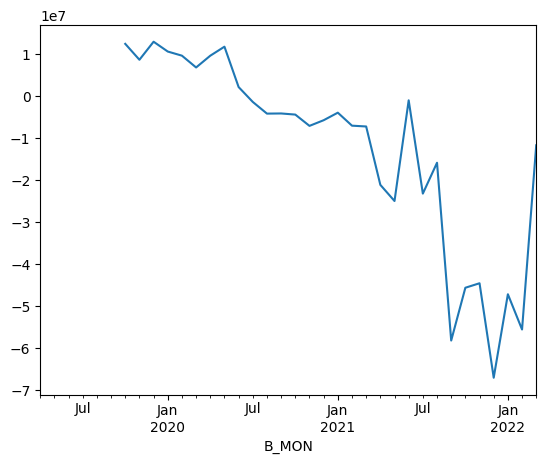

In [92]:
df1['Seasonal First Difference'].plot()


# Auto regressive model

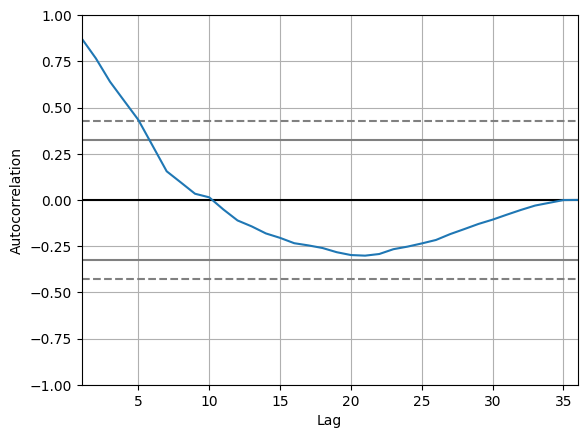

In [93]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['BILL_AMT'])
plt.show()


In [128]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df1['BILL_AMT'], order=(1, 1, 1))
model_fit = model.fit()

C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [129]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               BILL_AMT   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -612.407
Date:                Thu, 04 May 2023   AIC                           1230.813
Time:                        16:59:29   BIC                           1235.479
Sample:                    04-01-2019   HQIC                          1232.424
                         - 03-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5531      3.782     -0.146      0.884      -7.965       6.859
ma.L1          0.5351      3.843      0.139      0.889      -6.997       8.067
sigma2      9.509e+13   1.48e-12   6.42e+25      0.000    9.51e+13    9.51e+13
===================================================================================
Ljung-Box (L1) (Q):                   1.17   Jarque-Bera (JB):               164.54
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):              22.24   Skew:                            -2.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.17e+41. Standard errors may be unstable.
"""

In [130]:
model_fit.predict(start=40,end=60,dynamic=True)


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


2022-08-01    3.319357e+07
2022-09-01    3.319539e+07
2022-10-01    3.319438e+07
2022-11-01    3.319494e+07
2022-12-01    3.319463e+07
2023-01-01    3.319480e+07
2023-02-01    3.319471e+07
2023-03-01    3.319476e+07
2023-04-01    3.319473e+07
2023-05-01    3.319475e+07
2023-06-01    3.319474e+07
2023-07-01    3.319474e+07
2023-08-01    3.319474e+07
2023-09-01    3.319474e+07
2023-10-01    3.319474e+07
2023-11-01    3.319474e+07
2023-12-01    3.319474e+07
2024-01-01    3.319474e+07
2024-02-01    3.319474e+07
2024-03-01    3.319474e+07
2024-04-01    3.319474e+07
Freq: MS, Name: predicted_mean, dtype: float64

In [131]:
df1['forecast']=model_fit.predict(start=20,end=60,dynamic=True)


In [132]:
df1

,BILL_AMT,bill_amt First Difference,Seasonal First Difference,forecast
B_MON,,,,
2019-04-01,9.429956e+07,NaN,NaN,NaN
2019-05-01,1.006964e+08,6396846.41,NaN,NaN
2019-06-01,1.007456e+08,49148.42,NaN,NaN
2019-07-01,1.054412e+08,4695681.91,NaN,NaN
2019-08-01,1.066195e+08,1178223.89,NaN,NaN
2019-09-01,1.078479e+08,1228451.91,NaN,NaN
2019-10-01,1.066540e+08,-1193866.07,12354486.47,NaN
2019-11-01,1.092705e+08,2616437.15,8574077.21,NaN
2019-12-01,1.136057e+08,4335182.94,12860111.73,NaN


<Axes: xlabel='B_MON'>

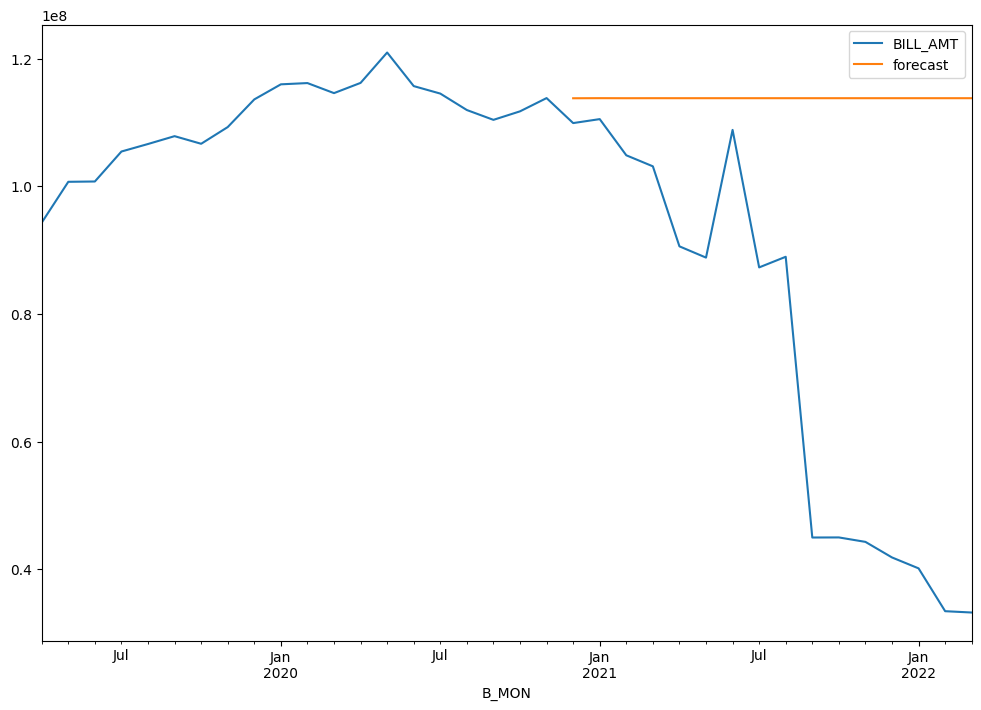

In [133]:
df1[['BILL_AMT','forecast']].plot(figsize=(12,8))

In [134]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df1['BILL_AMT'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [135]:
results.predict(start=20,end=80,dynamic=True)


2020-12-01    1.182638e+08
2021-01-01    1.211679e+08
2021-02-01    1.209721e+08
2021-03-01    1.197935e+08
2021-04-01    1.057257e+08
                  ...     
2025-08-01    7.677872e+07
2025-09-01    7.496600e+07
2025-10-01    7.657292e+07
2025-11-01    7.841907e+07
2025-12-01    8.276777e+07
Freq: MS, Name: predicted_mean, Length: 61, dtype: float64

In [136]:
df1['forecast']=results.predict(start=20,end=80,dynamic=True)


In [137]:
df1

,BILL_AMT,bill_amt First Difference,Seasonal First Difference,forecast
B_MON,,,,
2019-04-01,9.429956e+07,NaN,NaN,NaN
2019-05-01,1.006964e+08,6396846.41,NaN,NaN
2019-06-01,1.007456e+08,49148.42,NaN,NaN
2019-07-01,1.054412e+08,4695681.91,NaN,NaN
2019-08-01,1.066195e+08,1178223.89,NaN,NaN
2019-09-01,1.078479e+08,1228451.91,NaN,NaN
2019-10-01,1.066540e+08,-1193866.07,12354486.47,NaN
2019-11-01,1.092705e+08,2616437.15,8574077.21,NaN
2019-12-01,1.136057e+08,4335182.94,12860111.73,NaN


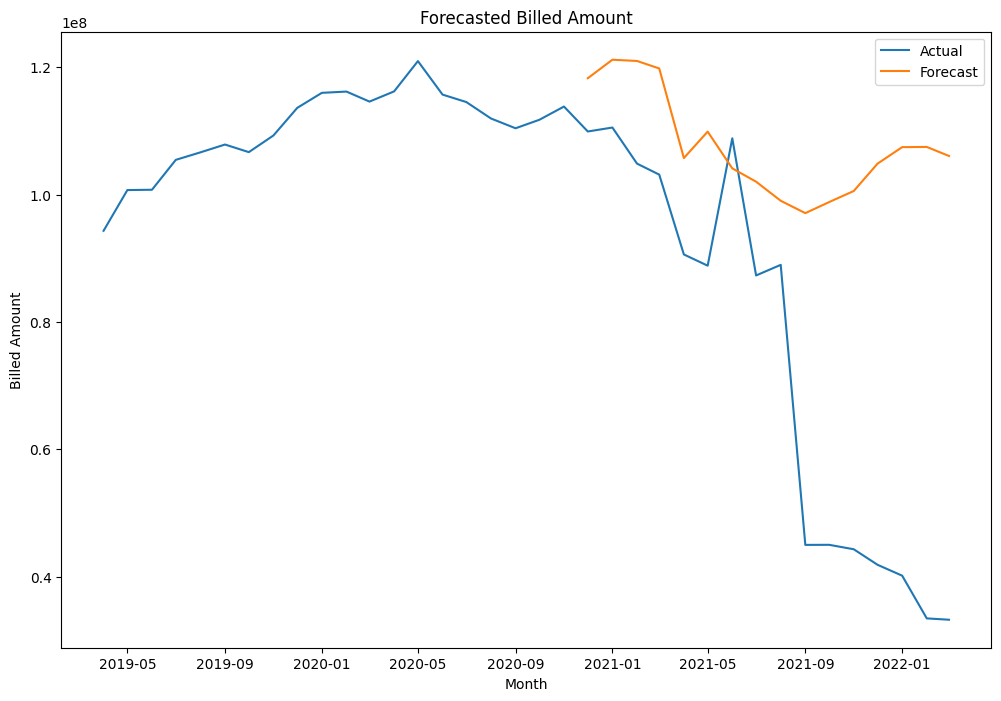

In [138]:
plt.figure(figsize=(12,8))
plt.plot(df1.index, df1['BILL_AMT'], label='Actual')
plt.plot(df1.index, df1['forecast'], label='Forecast')
plt.ylabel('Billed Amount')
plt.xlabel('Month')
plt.title('Forecasted Billed Amount')
plt.legend()
plt.show()


In [139]:
df1

,BILL_AMT,bill_amt First Difference,Seasonal First Difference,forecast
B_MON,,,,
2019-04-01,9.429956e+07,NaN,NaN,NaN
2019-05-01,1.006964e+08,6396846.41,NaN,NaN
2019-06-01,1.007456e+08,49148.42,NaN,NaN
2019-07-01,1.054412e+08,4695681.91,NaN,NaN
2019-08-01,1.066195e+08,1178223.89,NaN,NaN
2019-09-01,1.078479e+08,1228451.91,NaN,NaN
2019-10-01,1.066540e+08,-1193866.07,12354486.47,NaN
2019-11-01,1.092705e+08,2616437.15,8574077.21,NaN
2019-12-01,1.136057e+08,4335182.94,12860111.73,NaN


<Axes: xlabel='B_MON'>

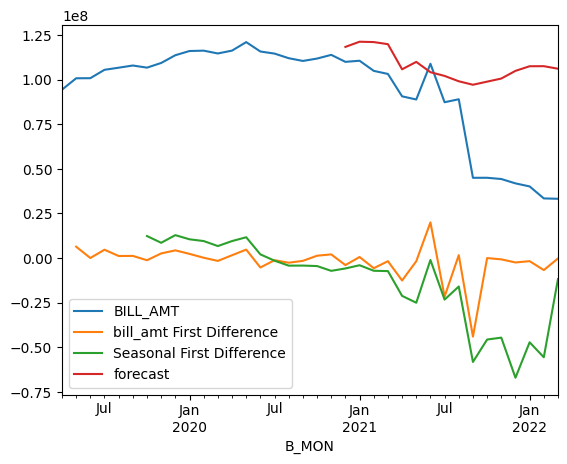

In [140]:
df1.plot()

<Axes: xlabel='B_MON'>

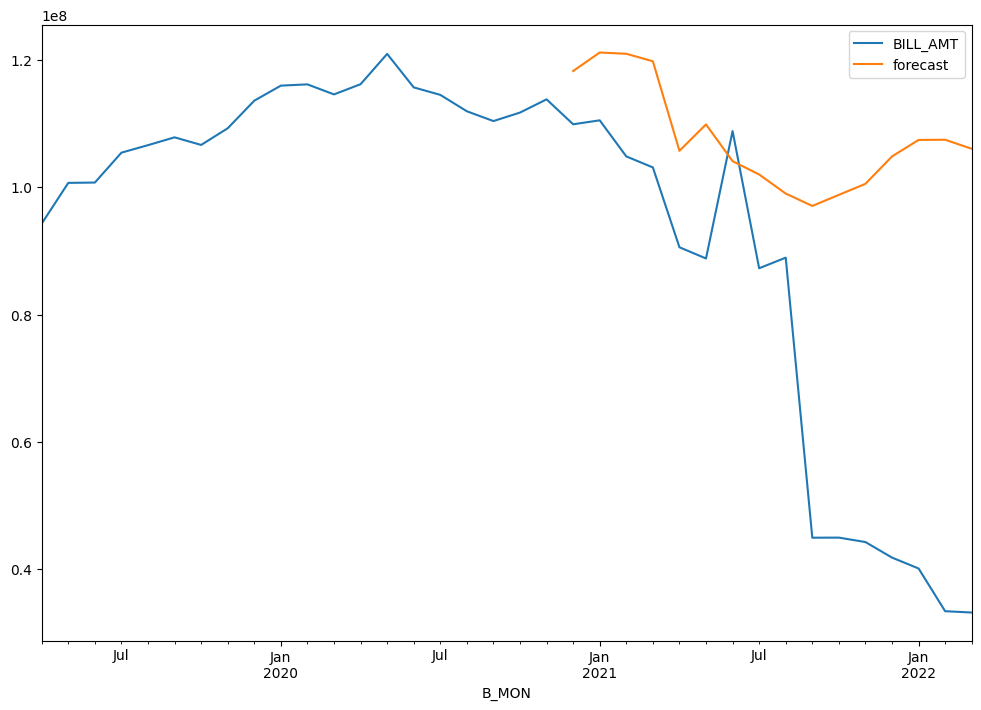

In [141]:
df1['forecast']=results.predict(start=20,end=80,dynamic=True)
df1[['BILL_AMT','forecast']].plot(figsize=(12,8))

In [142]:
from pandas.tseries.offsets import DateOffset


In [143]:
df1

,BILL_AMT,bill_amt First Difference,Seasonal First Difference,forecast
B_MON,,,,
2019-04-01,9.429956e+07,NaN,NaN,NaN
2019-05-01,1.006964e+08,6396846.41,NaN,NaN
2019-06-01,1.007456e+08,49148.42,NaN,NaN
2019-07-01,1.054412e+08,4695681.91,NaN,NaN
2019-08-01,1.066195e+08,1178223.89,NaN,NaN
2019-09-01,1.078479e+08,1228451.91,NaN,NaN
2019-10-01,1.066540e+08,-1193866.07,12354486.47,NaN
2019-11-01,1.092705e+08,2616437.15,8574077.21,NaN
2019-12-01,1.136057e+08,4335182.94,12860111.73,NaN


In [144]:
df1.index[-1]

Timestamp('2022-03-01 00:00:00')

In [145]:
[df1.index[-1]+ DateOffset(months=x)for x in range(0,24)]

[Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-01 00:00:00'),
 Timestamp('2023-04-01 00:00:00'),
 Timestamp('2023-05-01 00:00:00'),
 Timestamp('2023-06-01 00:00:00'),
 Timestamp('2023-07-01 00:00:00'),
 Timestamp('2023-08-01 00:00:00'),
 Timestamp('2023-09-01 00:00:00'),
 Timestamp('2023-10-01 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-01-01 00:00:00'),
 Timestamp('2024-02-01 00:00:00')]

In [146]:
future_dates=[df1.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [147]:
future_dates

[Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-01 00:00:00'),
 Timestamp('2023-04-01 00:00:00'),
 Timestamp('2023-05-01 00:00:00'),
 Timestamp('2023-06-01 00:00:00'),
 Timestamp('2023-07-01 00:00:00'),
 Timestamp('2023-08-01 00:00:00'),
 Timestamp('2023-09-01 00:00:00'),
 Timestamp('2023-10-01 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-01-01 00:00:00'),
 Timestamp('2024-02-01 00:00:00')]

In [148]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df1.columns)
future_datest_df.tail(15)

,BILL_AMT,bill_amt First Difference,Seasonal First Difference,forecast
2022-12-01,NaN,NaN,NaN,NaN
2023-01-01,NaN,NaN,NaN,NaN
2023-02-01,NaN,NaN,NaN,NaN
2023-03-01,NaN,NaN,NaN,NaN
2023-04-01,NaN,NaN,NaN,NaN
2023-05-01,NaN,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN,NaN
2023-07-01,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,NaN


In [149]:
future_df=pd.concat([df1,future_datest_df])
future_df

,BILL_AMT,bill_amt First Difference,Seasonal First Difference,forecast
2019-04-01,9.429956e+07,NaN,NaN,NaN
2019-05-01,1.006964e+08,6396846.41,NaN,NaN
2019-06-01,1.007456e+08,49148.42,NaN,NaN
2019-07-01,1.054412e+08,4695681.91,NaN,NaN
2019-08-01,1.066195e+08,1178223.89,NaN,NaN
2019-09-01,1.078479e+08,1228451.91,NaN,NaN
2019-10-01,1.066540e+08,-1193866.07,12354486.47,NaN
2019-11-01,1.092705e+08,2616437.15,8574077.21,NaN
2019-12-01,1.136057e+08,4335182.94,12860111.73,NaN
2020-01-01,1.159678e+08,2362135.87,10526565.69,NaN


In [150]:
results.predict(start = 30, end = 120, dynamic= True)

2021-10-01    5.130364e+07
2021-11-01    4.972226e+07
2021-12-01    4.723808e+07
2022-01-01    4.559172e+07
2022-02-01    4.087119e+07
                  ...     
2028-12-01   -3.598475e+08
2029-01-01   -3.614080e+08
2029-02-01   -3.658945e+08
2029-03-01   -3.687701e+08
2029-04-01   -3.744811e+08
Freq: MS, Name: predicted_mean, Length: 91, dtype: float64

<Axes: >

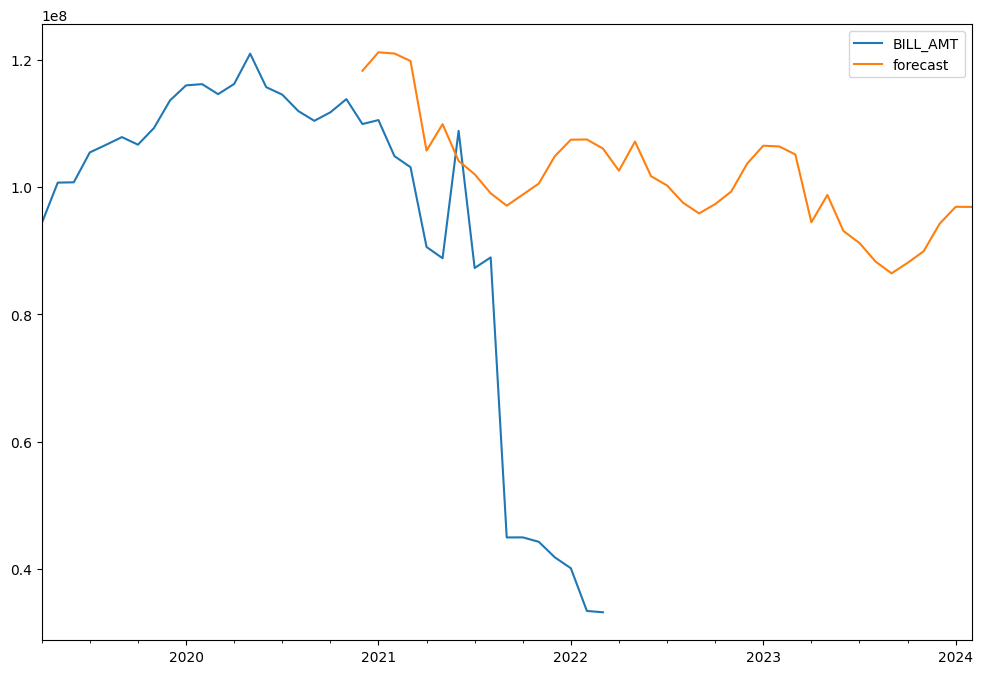

In [151]:
future_df['forecast'] = results.predict(start = 20, end = 90, dynamic= True)  
future_df[['BILL_AMT', 'forecast']].plot(figsize=(12, 8)) 

<Axes: >

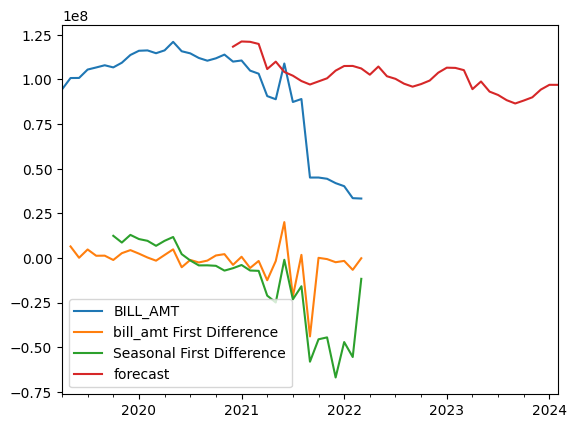

In [152]:
future_df.plot()

<Axes: xlabel='Date'>

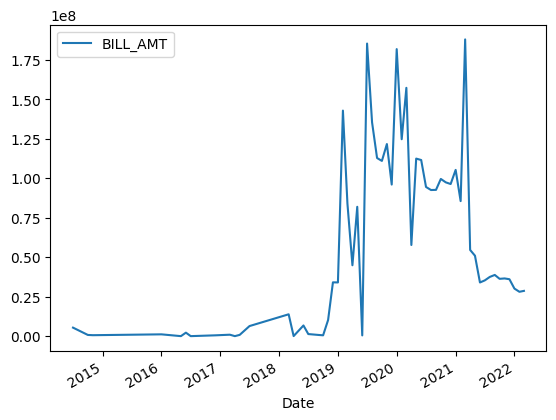

In [154]:
df.plot()


<Axes: >

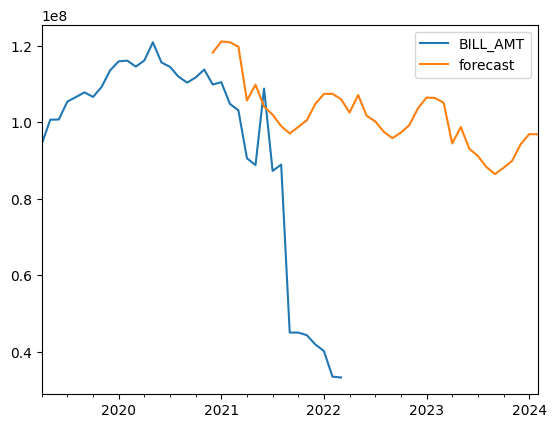

In [158]:
future_df[['BILL_AMT','forecast']].plot()

# Sales forecasting 

ARIMA and Seasonal ARIMA

# Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:

Visualize the Time Series Data

Make the time series data stationary

Plot the Correlation and AutoCorrelation Charts

Construct the ARIMA Model or Seasonal ARIMA based on the data

Use the model to make predictions

In [160]:
%matplotlib inline


In [171]:
df=pd.read_csv('sales.csv')
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [172]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [173]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [174]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [175]:
df.drop(105,axis=0,inplace=True)
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [176]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [177]:
df.set_index('Month',inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [178]:
df.describe()


,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Visualize the Data

<Axes: xlabel='Month'>

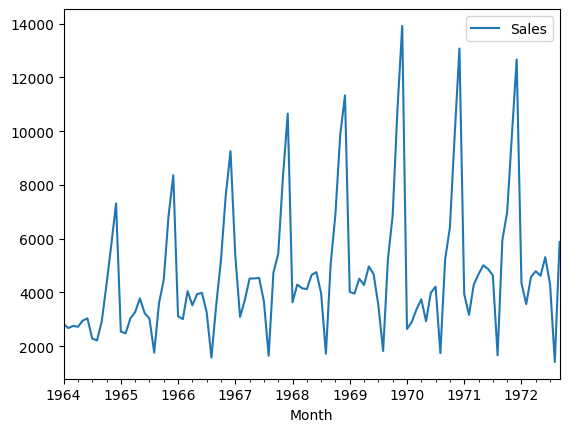

In [179]:
df.plot()


In [180]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sales'])

In [181]:
test_result

(-1.833593056327623,
 0.363915771660245,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [182]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [183]:
adfuller_test(df['Sales'])


ADF Test Statistic : -1.833593056327623
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing


In [184]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)


In [185]:
df['Sales First Difference']

Month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: Sales First Difference, Length: 105, dtype: float64

In [186]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [187]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [188]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

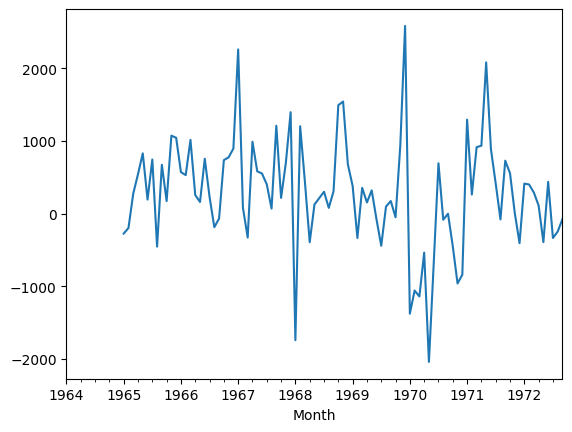

In [189]:
df['Seasonal First Difference'].plot()


# Auto Regressive Model

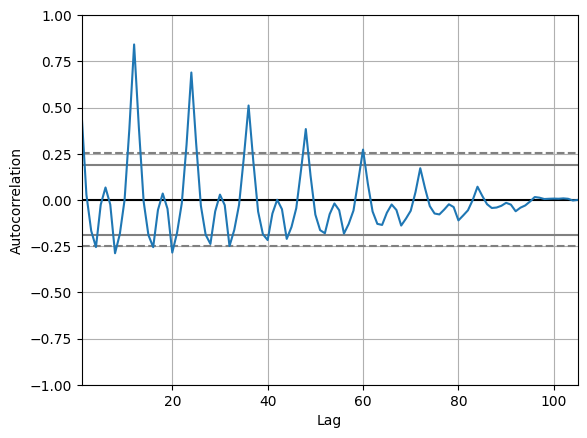

In [192]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

# Autocorrelation and Partial Autocorrelation

C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


shutoff-  drop from top to next point


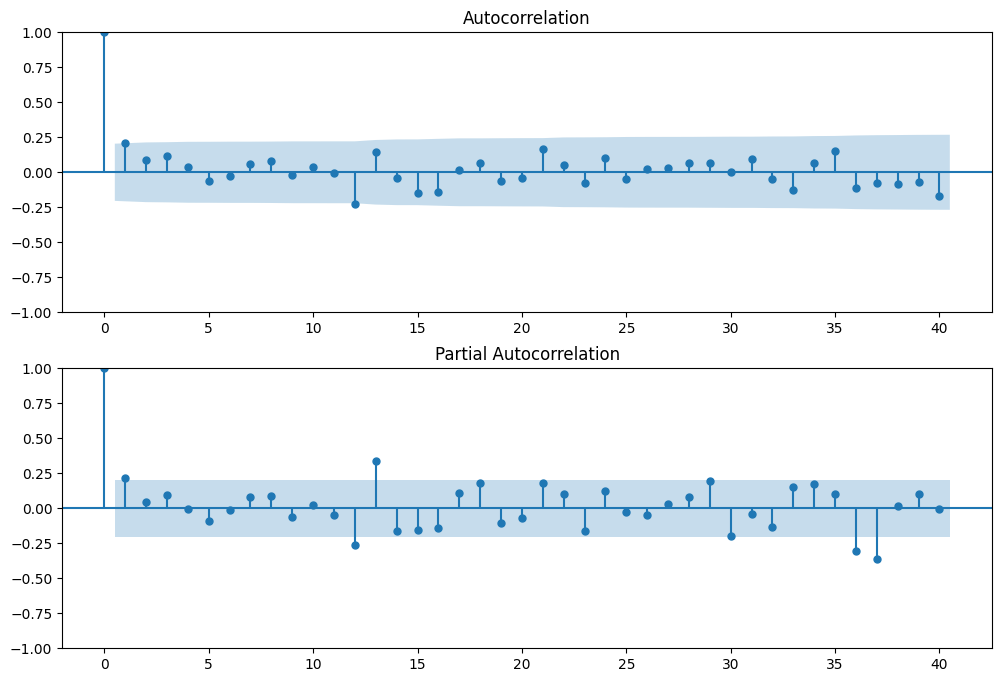

In [209]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

print('shutoff-  drop from top to next point')

In [199]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [200]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Thu, 04 May 2023   AIC                           1911.627
Time:                        17:17:24   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

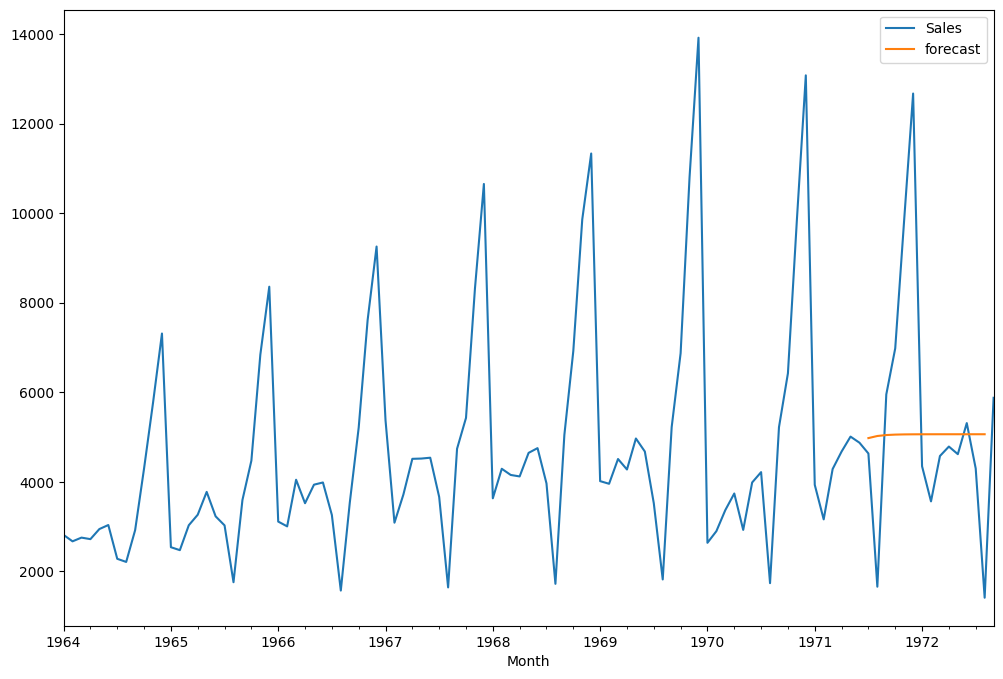

In [201]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [202]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

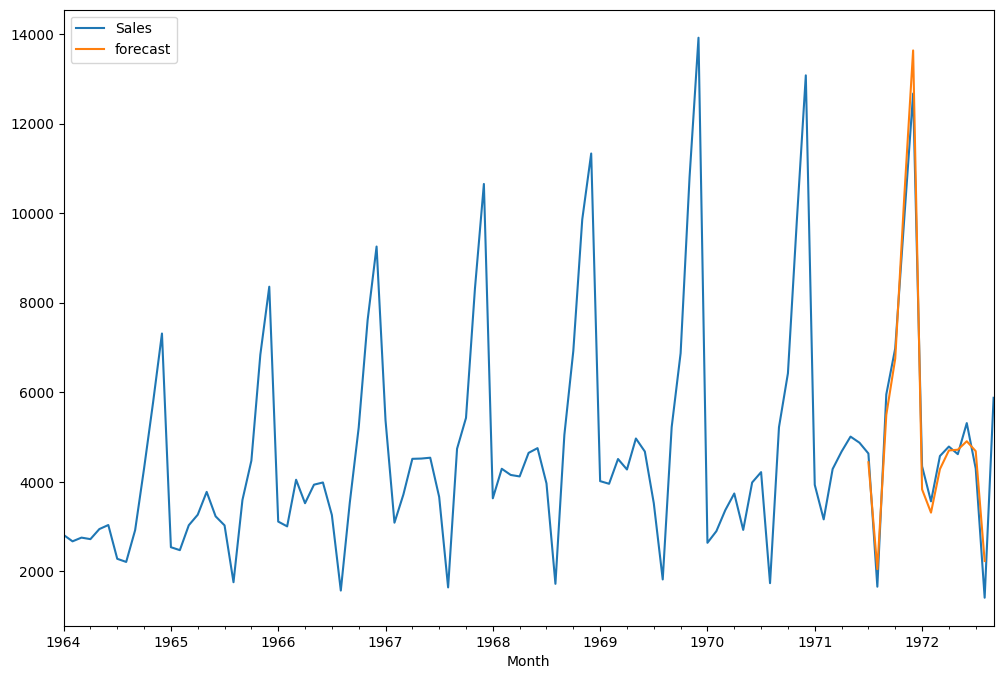

In [203]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [204]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [205]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [206]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df

,Sales,Sales First Difference,Seasonal First Difference,forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN


In [207]:
future_df=pd.concat([df,future_datest_df])
future_df

,Sales,Sales First Difference,Seasonal First Difference,forecast
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN
...,...,...,...,...
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN


<Axes: >

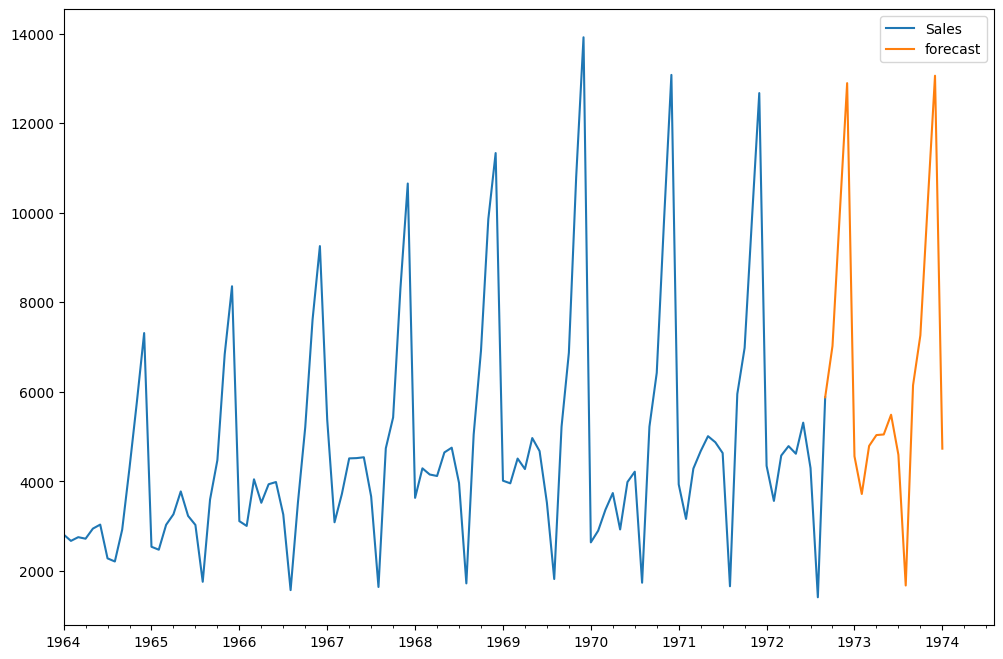

In [208]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

# Terms used in time series forecasting:


# convert non stationary data to stationary data

# detecting and removing seasonality using the seasonal_decompose() function from the statsmodels package:




# calculating and visualizing the moving average of a time series using the rolling() function from the pandas package:

# Neural network in time series

# Arimax and sarimax

# Exponential smoothening

# Residual and error

# Lag and autocorrelation

# Time series code for reference 